# ECE 311 Lab Final:

## Due Date: 5/8 @ 11:59PM on Canvas
### Note: a 10% penalty will be applied for each hour your submission is late!

This lab final will review the import concepts from the course. Much of this lab should be familiar from previous labs. We encourage you to look back on your previous labs or look at the posted lab solutions on the course website to remind you how to produce your results and evaluate their correctness. Enough talking, let's get started!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy import signal
from pz_plot import pz_plot
from scipy.io import wavfile
from numpy.random import randn
from IPython.display import Audio

#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

%matplotlib inline

## Exercise 1: Building an Edge Detector 2.0

In Lab 2 Exercise 4, we built a simple edge detector by applying a high-pass filter along the rows and columns of an image, then combined the two results to create an image of detected edges. In this exercise, we will build a more sophisticated edge detector by adding onto our original design. This improved detector is known as the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

The Sobel operator uses the same intuition of finding horizontal and vertical edges separately, then combining these results to form the image. Let $G_x$ be our resulting image from detecting vertical edges (through the x-axis) and $G_y$ be our resulting image from detecting horizontal edges (through the y-axis, then our final result will be given by

$$
G[i,j] = \sqrt{G^2_x[i,j]+G^2_y[i,j]},
$$

where $G[i,j]$ is the pixel value at row $i$, column $j$. We compute $G_x$ and $G_y$ via convolution as follows:

$$
G_x = I * \begin{bmatrix}
1 & 0 & -1\\
\end{bmatrix} * \begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$
G_y = I * \begin{bmatrix}
1\\
0\\
-1\\
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix},
$$

where $I$ is our original image and $*$ denotes the convolution operator. Note that in the computation of $G_x$ we convolve along the rows with a high-pass filter and convolve along the columns with a low-pass filter, while the computation of $G_y$ reverses this relationship with the same filters.

a. Compute the image $G_x$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **row** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **column**. Also, be sure to use the "same" mode when using $\textrm{signal.convolve()}$.

b. Compute the image $G_y$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **column** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **row**.

c. Create final result image $G$ according to the above formulation. Plot your resulting image in grayscale.

Text(0.5, 1.0, 'Horizontal + Vertical Edge Detection Image')

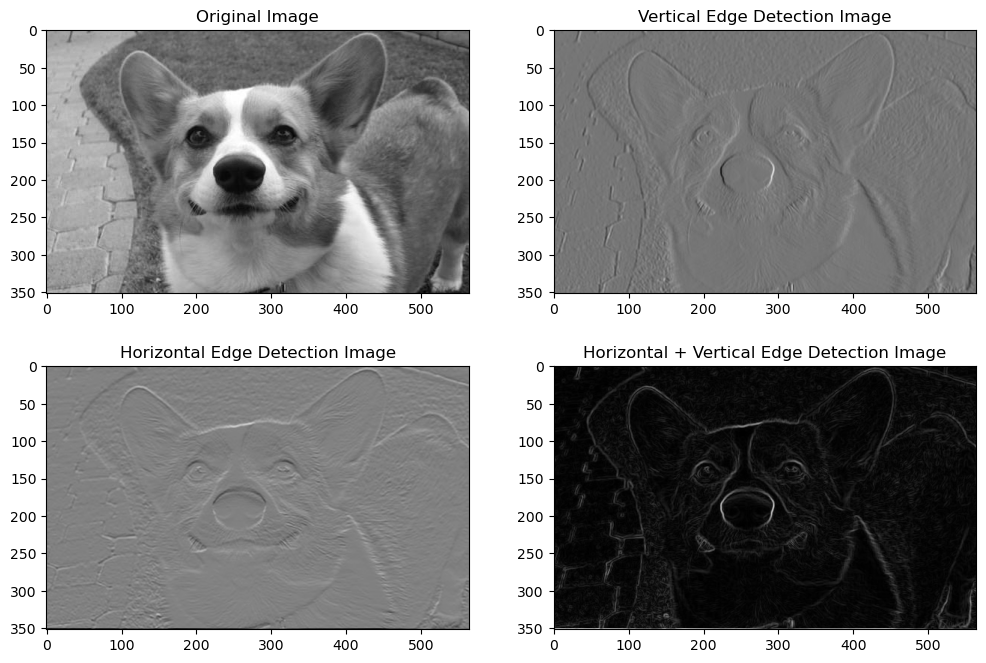

In [35]:
# Load test-image.jpg
image = imread('test-image.jpg')
n_rows, n_cols = image.shape
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(image, "gray")
plt.title("Original Image")

# Filters
LP = [1, 2, 1]
HP = [1, 0, -1]

# Part A: Detecting Vertical Edges
Gx = np.ones(image.shape)
# Apply HP to Rows; LP to Columns
for n in range(n_rows):
    Gx[n] = signal.convolve(image[n], HP, mode='same')
for n in range(n_cols):
    Gx[:,n] = signal.convolve(Gx[:,n], LP, mode='same')
plt.subplot(222)
plt.imshow(Gx, "gray")
plt.title("Vertical Edge Detection Image")

# Part B: Detecting Horizontal Edges
Gy = np.ones(image.shape)
# Apply LP to Rows; HP to Columns
for n in range(n_rows):
    Gy[n] = signal.convolve(image[n], LP, mode='same')
for n in range(n_cols):
    Gy[:,n] = signal.convolve(Gy[:,n], HP, mode='same')
plt.subplot(223)
plt.imshow(Gy, "gray")
plt.title("Horizontal Edge Detection Image")

# Part C: Final Horizontal + Vertical Edges
G = np.ones(image.shape)
# Calculate Norm
for i in range(n_rows):
    for j in range(n_cols):
        G[i, j] = np.sqrt(Gx[i, j]**2 + Gy[i, j]**2);
plt.subplot(224)
plt.imshow(G, "gray")
plt.title("Horizontal + Vertical Edge Detection Image")

## Exercise 2: LCCDE, Transfer Function, and Impulse Response

For each of the following Linear Constant Coefficient Difference Equations (LCCDE), determine the transfer function (numerator and denominator coefficients) in order to plot both the pole-zero plot and impulse response of the system for the requested number of points. **Please plot your impulse responses as a stem plot!** For each system, indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.

Note: We have provided the $\textrm{pz_plot}()$ function from Lab 3 to create your pole-zero plots. Refer to Lab 3 for usage of this function. Some other functions of interest you may want to use from Lab 3 will be $\textrm{signal.dimpulse()}$ and $\textrm{signal.tf2zpk()}$.

a. $y_1[n] = \frac{1}{4}x[n]-\frac{1}{16}x[n-1]+x[n-2]-
\frac{1}{16}x[n-3]+\frac{1}{4}x[n-4],\quad 0\leq n < 8$

b. $y_2[n] = x[n] + \frac{1}{4}x[n-2] - 2y_2[n-1] + 8y_2[n-2],\quad 0\leq n < 20$

c. $y_3[n] = x[n] - \frac{1}{2}x[n-2] - y_3[n-3], \quad 0\leq n < 20$

Part A:
Poles: [0. 0. 0. 0.]
Zeros: [0.09852147+1.92642149j 0.09852147-1.92642149j 0.02647853+0.51774303j
 0.02647853-0.51774303j]

Part B:
Poles: [-4.  2.]
Zeros: [-0.+0.5j  0.-0.5j]

Part C:
Poles: [-1. +0.j         0.5+0.8660254j  0.5-0.8660254j]
Zeros: [ 0.70710678 -0.70710678  0.        ]



<Figure size 640x480 with 0 Axes>

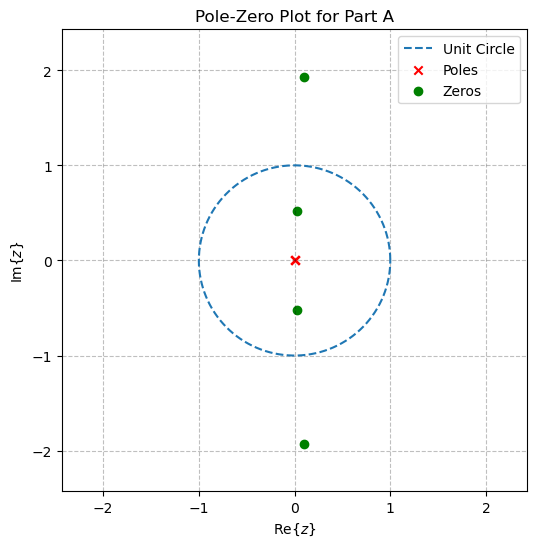

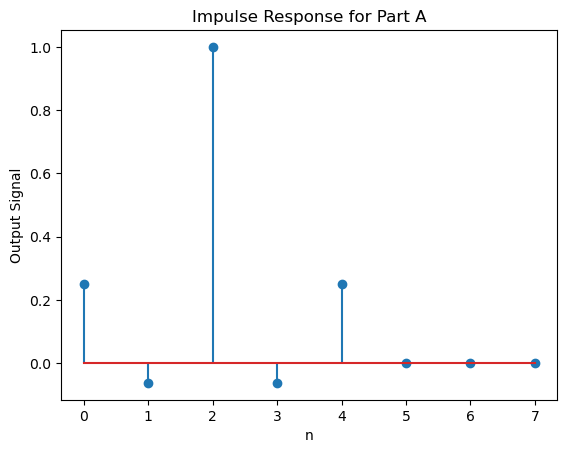

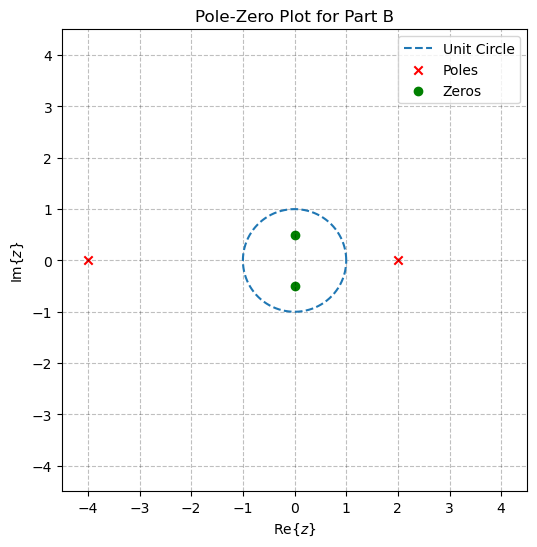

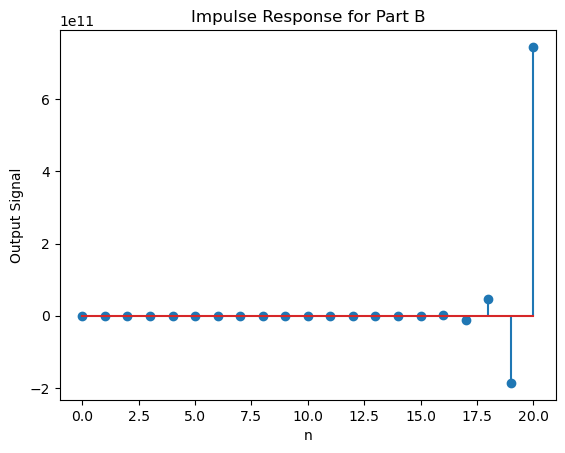

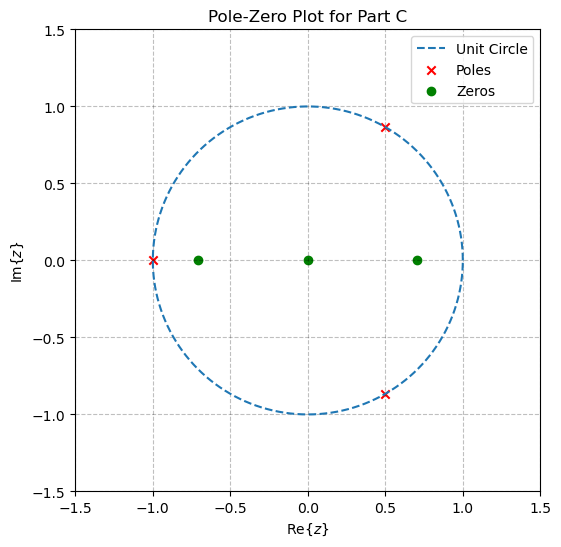

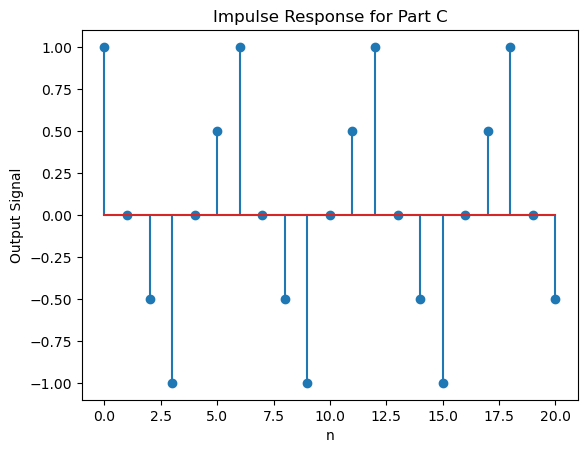

In [57]:
# Part A:
b = [1./4., -1./16., 1., -1./16., 1./4.] # Start at z^3
a = [1, 0, 0, 0, 0] # Start at z^3
z, p, k = signal.tf2zpk(b, a) # Find Poles and Zeros
# Poll Zero Plot
print("Part A:")
print('Poles:', p)
print('Zeros:', z)
plt.figure()
pz_plot(z, p, 'Pole-Zero Plot for Part A')
# Impulse Response
n,y = signal.dimpulse((b, a, 1), n=8) # 0 <= n <= 5
h_n = y[0]
# Plot Impulse Response
plt.figure()
plt.stem(n, h_n)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response for Part A')
print()

# Part B:
b = [1, 0, 1./4.] # Start at z^3
a = [1, 2, -8] # Start at z^3
z, p, k = signal.tf2zpk(b, a) # Find Poles and Zeros
# Poll Zero Plot
print("Part B:")
print('Poles:', p)
print('Zeros:', z)
pz_plot(z, p, 'Pole-Zero Plot for Part B')
# Impulse Response
n,y = signal.dimpulse((b, a, 1), n=21) # 0 <= n <= 5
h_n = y[0]
# Plot Impulse Response
plt.figure()
plt.stem(n, h_n)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response for Part B')
print()

# Part C:
b = [1, 0, -1./2., 0] # Start at z^2
a = [1, 0, 0, 1] # Start at z^2
z, p, k = signal.tf2zpk(b, a) # Find Poles and Zeros
# Poll Zero Plot
print("Part C:")
print('Poles:', p)
print('Zeros:', z)
pz_plot(z, p, 'Pole-Zero Plot for Part C')
# Impulse Response
n,y = signal.dimpulse((b, a, 1), n=21) # 0 <= n <= 5
h_n = y[0]
# Plot Impulse Response
plt.figure()
plt.stem(n, h_n)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response for Part C')
print()

A.): This system is BIBO stable since it only contains a pole at z = 0. Thus, its region of convergence includes the unit circle making it BIBO stable.

B.): This system is not BIBO stable since its outermost pole is outside the unit circle. 

C.): This system is marginally stable because it contains poles that lie exactly on the unit circle. 

## Exercise 3: Windows and Spectral Resolution

**Note: please specify 512 points for each FFT you take in this problem!**

a. Plot the magnitude spectrum (not dB scale) of the following signal using $\textrm{np.fft.rfft()}$.

$$
x_1[n] = 0.5\sin\left(0.5\pi n\right) + 0.02\sin\left(0.6\pi n\right), \quad 0\leq n < 80
$$

What is happening to the second sinusoid with the smaller magnitude in the frequency domain? Is it easy to locate this frequency peak?

b. Fill in the function $\textrm{modify()}$ below which applies a Hamming window to an input signal. Apply this function to $x_1[n]$ and plot the resulting magnitude spectrum. Is it easier to locate the smaller frequency now?

c. Now let's try resolving two close, but equally large frequency peaks in the below signal $x_2[n]$.

$$
x_2[n] = 0.5\sin\left(0.6\pi n\right) + 0.5\sin\left(0.618\pi n\right), \quad 0\leq n < 80
$$

Plot the magnitude spectrum of $x_2[n]$ (not dB scale) before and after applying the $\textrm{modify()}$ function. Is it easier to differentiate between the two peaks after applying the Hamming window? Why or why not? **Hint: think about the tradeoff between rectangular and Hamming windows!**


<Figure size 1200x1500 with 0 Axes>

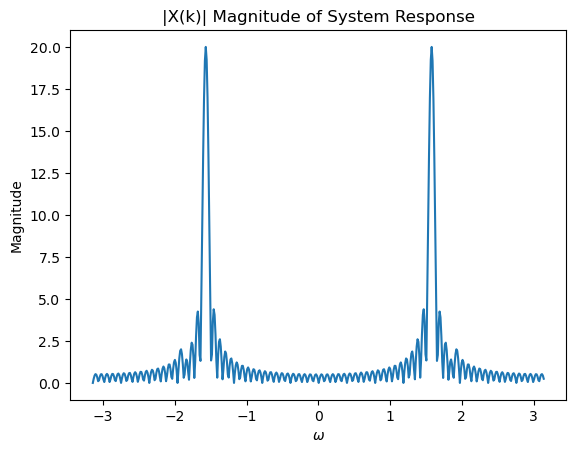

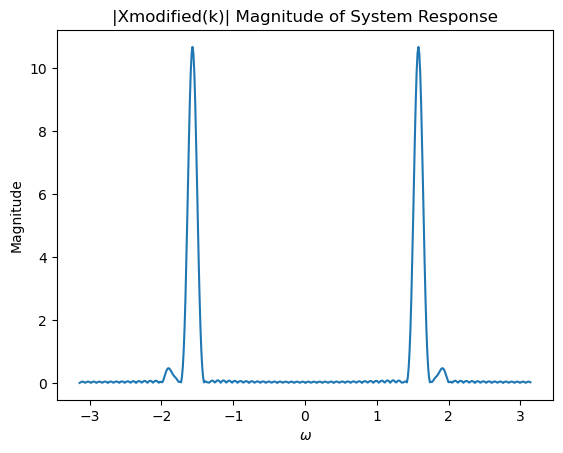

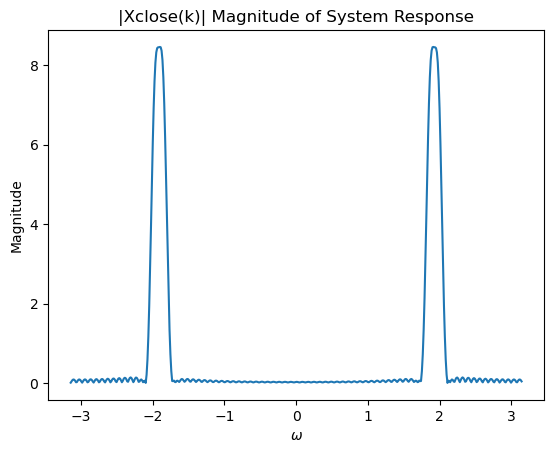

In [63]:
# Figure Configuration
plt.figure(figsize=(12, 15))

# Part A:
N = 80
x = [(0.5*np.sin(0.5*np.pi*n) + 0.02*np.sin(0.6*np.pi*n)) for n in range(N)]                    # x[n]
x_fft = np.fft.fft(x, 512)                    # Compute DTFT
centered_x_fft = np.fft.fftshift(x_fft)       # shifts central frequency to middle of array
w = np.linspace(-np.pi, np.pi, len(centered_x_fft)) # Frequency axis

# Magnitude Pplot
plt.figure()
plt.title('|X(k)| Magnitude of System Response')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.plot(w, np.absolute(centered_x_fft))

# Part B:
def hamming(x):
    modified = x * np.hamming(N)
    return modified
x_modified = hamming(x)
x_modified_fft = np.fft.fft(x_modified, 512)                    # Compute DTFT
centered_x_modified_fft = np.fft.fftshift(x_modified_fft)       # shifts central frequency to middle of array
w = np.linspace(-np.pi, np.pi, len(centered_x_modified_fft)) # Frequency axis

# Magnitude Plot
plt.figure()
plt.title('|Xmodified(k)| Magnitude of System Response')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.plot(w, np.absolute(centered_x_modified_fft))

# Part C:
N = 80
x_new = [(0.5*np.sin(0.6*np.pi*n) + 0.5*np.sin(0.618*np.pi*n)) for n in range(N)] # x_close[n]
x_close = hamming(x_new)
x_close_fft = np.fft.fft(x_close, 512)                    # Compute DTFT
centered_x_close_fft = np.fft.fftshift(x_close_fft)       # shifts central frequency to middle of array
w = np.linspace(-np.pi, np.pi, len(centered_x_close_fft)) # Frequency axis

# Magnitude Pplot
plt.figure()
plt.title('|Xclose(k)| Magnitude of System Response')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.plot(w, np.absolute(centered_x_close_fft))

Part A: The second sinusoid with the smaller magnitude is getting swamped out by the sidelobe noise of the larger magnitude sinusoid. Thus, it is not easy to locate the frequency peak of the second sinusoid with the smaller magnitude.

Part B: With the side lobe noise reduced by the hamming window, it is much easier to locate the smaller magnitude sinusoid in the frequency plot.

Part C: It is not easy to differentiate between the two peaks after applying the Hamming window. The reason is because the Hamming window has a wide transition bandwidth between the passband and stopband, which means it cannot separate the close peaks between the two sinusoids. A rectangular window provides the best ability to separate close frequency peaks.

## Exercise 4: Chirp Redux

For this exercise, we will revisit the chirp activity from Lab 4 but this time with the help of spectrograms to visualize our chirps. The below provided code creates a five second long chirp signal with sampling rate $f_s$ = 44,100 Hz and maximum signal frequency 22,050 Hz. Recall that the $\textrm{signal.chirp}$ function linearly sweeps between the requested frequencies over the set time interval. Hint: referring back to Labs 4 and 5 will help with understanding the chirp function and plotting spectrograms, respectively.

a. Plot the spectrogram of the original chirp signal we have generated for you.

b. Reduce the sampling rate of the original chirp signal by a factor of 7. Plot the resulting spectrogram and explain what you see. If we listened to this audio signal, how many rises and falls would you hear? **Note: you may either create a new chirp signal using the requested lower sampling or perform downsampling without an anti-aliasing filter.**

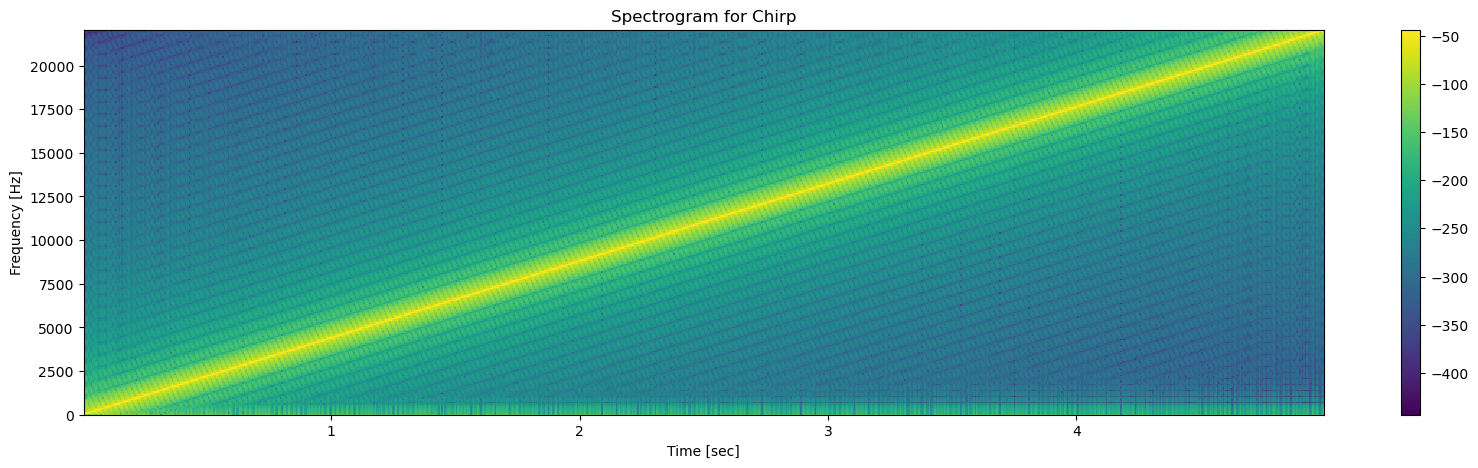

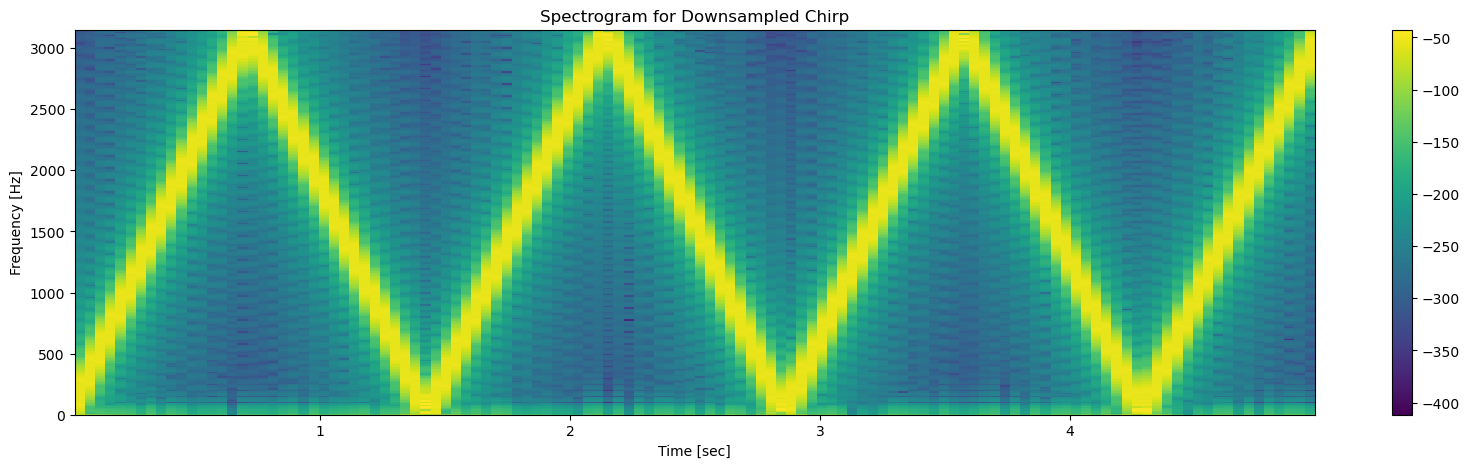

In [74]:
Fs = 44100 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t, f0 = f0, t1 = t1, f1 = f1)
nfft = 1024

# Part A:
# Create Spectrogram
nfft = 512
f_chirp, t_chirp, S_chirp = signal.spectrogram(chirp_original, Fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)

# Plot Spectrogram
plt.figure(figsize=(20,5))
plt.pcolormesh(t_chirp, f_chirp, sig2db(S_chirp))
plt.title('Spectrogram for Chirp')
plt.ylim([0, f1])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

# Part B:
Fs_downsample = Fs / 7.
t = np.linspace(0, t1, int(t1*Fs_downsample))
chirp_downsample = signal.chirp(t, f0 = f0, t1 = t1, f1 = f1)

# Create Spectrogram
nfft = 512
f_downsample, t_downsample, S_downsample = signal.spectrogram(chirp_downsample, Fs_downsample, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)

# Plot Spectrogram
plt.figure(figsize=(20,5))
plt.pcolormesh(t_downsample, f_downsample, sig2db(S_downsample))
plt.title('Spectrogram for Downsampled Chirp')
plt.ylim([0, f1/7])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

# Play Audio
Audio(data=chirp_downsample, rate=Fs_downsample)

Part B: The resulting spectrogram has periodic cycles. It contains 3.5 rising, dropping cycles. After listening to the audio, I hear four rises and three falls, which matches the spectrogram.

## Exercise 5: FIR Filter Design

a. Given the audio signal file ``Sound_original.wav``, compute and display the full FFT magnitude spectrum (no dB scale). Try listening to it!

b. Now let's assume that we pass this audio signal into a system described as followed.

<img src="./sys_illus.png" alt="Drawing" style="width: 600px;"/>

where $x[n]$ is our audio signal, $H(\omega)$ is an LTI system with impulse response $h[n]$, $d[n]$ is some noise, and $y[n]$ is the ouput. 
For this question, we want to simulate the ouput result $y[n]$.

We only know that the LTI system $H(\omega)$ is acting like a low-pass filter with a cutoff frequency of $\frac{\pi}{3}$. Use $\textrm{signal.remez()}$ to obtain the impulse response of this system assuming the filter length is $N = 100$ and the transition bandwidth is $\frac{\pi}{10}$. Plot magnitude response **on a dB scale** using the provided $\textrm{sig2db()}$ function. 

c. Now, we can obtain output $y[n]$ by filtering $x[n]$ with $h[n]$ and adding $d[n]$ after filtering. 

Here, $d[n]$ is assumed to be additive white Gaussian noise (AWGN). We can create our noise $d[n]$ by typing

``d = 2250 * np.random.randn(len(x_filtered))``

Compute $y[n]$ by summing your filtered audio signal $x[n]*h[n]$ and d. Try listening to y! Plot the FFT magnitude spectrum of $d[n]$ and the FFT magnitude spectrum of $y[n]$ on separate figures (no dB scale). Judging from these two graphs, do you think the simple filtering methods we have discussed in class will be able to perfectly separate our noise $d[n]$ from the filtered audio $x[n]*h[n]$?

C:\Users\unbre\AppData\Local\Temp\ipykernel_20400\2779131902.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, original = wavfile.read('Sound_original.wav')


<Figure size 1200x1500 with 0 Axes>

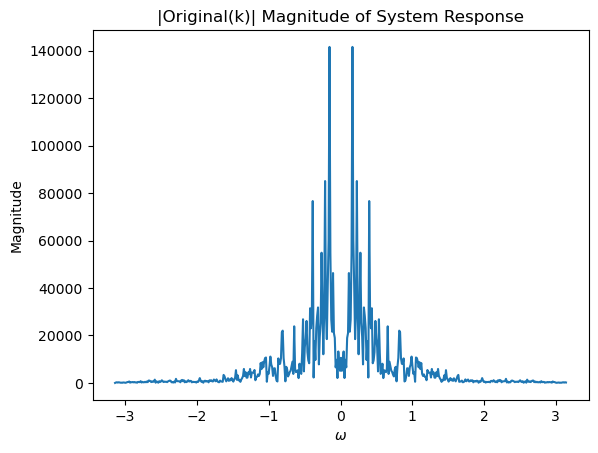

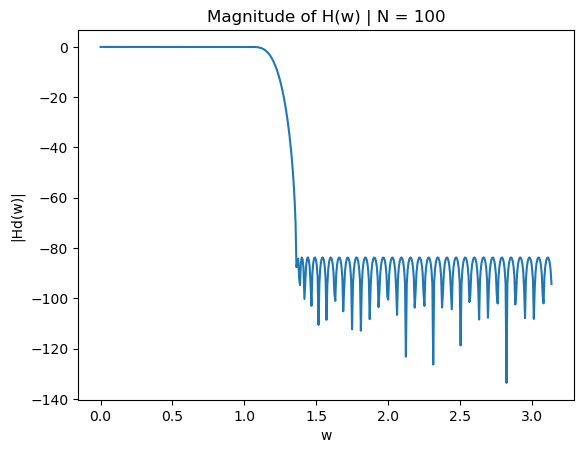

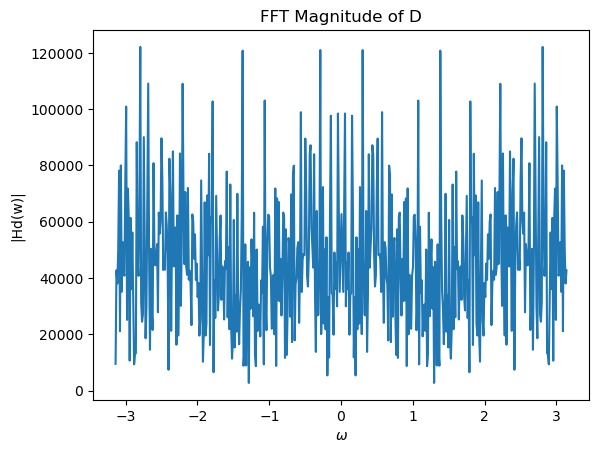

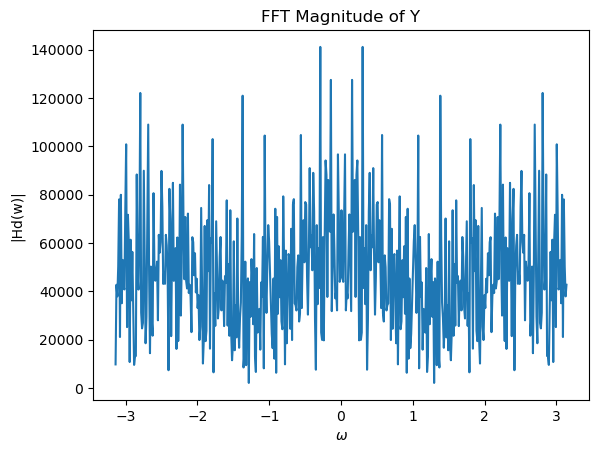

In [87]:
# Figure Configuration
plt.figure(figsize=(12, 15))

# Original Audio Waveform
fs, original = wavfile.read('Sound_original.wav')

# Part A:
original_fft = np.fft.fft(original, 512)                    # Compute DTFT
centered_original_fft = np.fft.fftshift(original_fft)       # shifts central frequency to middle of array
w = np.linspace(-np.pi, np.pi, len(centered_original_fft)) # Frequency axis
# Magnitude Pplot
plt.figure()
plt.title('|Original(k)| Magnitude of System Response')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.plot(w, np.absolute(centered_original_fft))

# Play Audio
# Audio(data=original, rate=fs)

# Part B:
# Low Pass Filter
# 0 - 0.333 Passband, 0.433 - 1 Passband, 0.333 - 0.433 Transition Band
lpf_bands = [0, 1./3., 1./3. + 0.1, 1]
lpf_desired = [1, 0] # gain of one for passband, gain of zero for stopband

# Impulse Responses
N = 100
h_lpf = signal.remez(N, lpf_bands, lpf_desired, fs=2)

# Frequency Responses
p1, H_lpf = signal.freqz(h_lpf)

# Plots
plt.figure()
plt.plot(p1, sig2db(np.abs(H_lpf)))
plt.title("Magnitude of H(w) | N = 100")
plt.xlabel("w")
plt.ylabel("|Hd(w)|")

# Part C:
# Apply Filter
x_filtered = signal.convolve(original, h_lpf)

# Y / Noise
d = 2250 * np.random.randn(len(x_filtered))
y = x_filtered + d

# Plots
d_fft = np.fft.fft(d, 512)                    # Compute DTFT
centered_d_fft = np.fft.fftshift(d_fft)       # shifts central frequency to middle of array
w = np.linspace(-np.pi, np.pi, len(centered_d_fft)) # Frequency axis
plt.figure()
plt.title("FFT Magnitude of D")
plt.xlabel('$\omega$')
plt.ylabel("|Hd(w)|")
plt.plot(w, np.absolute(centered_d_fft))

y_fft = np.fft.fft(y, 512)                    # Compute DTFT
centered_y_fft = np.fft.fftshift(y_fft)       # shifts central frequency to middle of array
w = np.linspace(-np.pi, np.pi, len(centered_y_fft)) # Frequency axis
plt.figure()
plt.title("FFT Magnitude of Y")
plt.xlabel('$\omega$')
plt.ylabel("|Hd(w)|")
plt.plot(w, np.absolute(centered_y_fft))

# Play Audio
Audio(data=y, rate=fs)

Part C: The noise in the FFT of the final signal, y, is mixed throughout all frequencies, not just isolated in one particular region. Therefore, it will not be easy to apply our simple filetering method discussed in this class to separate out the noise.

# Submission Instructions:

Please place all files in one folder, compress that folder as a zip file, and name the zip file ``netid_labfinal``. Submit your zip file to Canvas like previous labs.